<a href="https://colab.research.google.com/github/Dhayanshariff/Task-6_Assignment-4-5-6-7-8/blob/main/Assignment%205%2C%206%20%26%207/Task_6_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df1 = pd.DataFrame(ground_cricket_data)
df1.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
ground_temp = df[['Ground Temperature']]
ground_temp.head()

,Ground Temperature
0,88.6
1,71.6
2,93.3
3,84.3
4,80.6


In [7]:
chirps_per_sec = df[['Chirps/Second']]
chirps_per_sec.head()

,Chirps/Second
0,20.0
1,16.0
2,19.8
3,18.4
4,17.1


In [11]:
regression_model = linear_model.LinearRegression()
regression_model.fit(ground_temp,chirps_per_sec)
regression_model.coef_

array([[0.20299973]])

In [12]:
regression_model.intercept_

array([0.45931465])

In [53]:
# 1. Find the linear regression equation for this data.
print('y = ', regression_model.coef_[0],'* x +',regression_model.intercept_)

y =  [0.20299973] * x + [0.45931465]


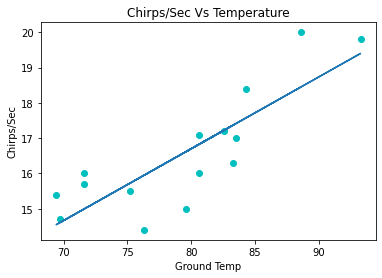

In [50]:
# 2. Chart the original data and the equation on the chart.
plt.scatter(ground_temp, chirps_per_sec, color='c')
plt.plot(ground_temp, regression_model.predict(ground_temp))
plt.title('Chirps/Sec Vs Temperature')
plt.xlabel('Ground Temp')
plt.ylabel('Chirps/Sec')
plt.show()

In [58]:
# 3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
r_square = regression_model.score(ground_temp, chirps_per_sec)
print(f'R^2 score for this equation: {r_square:.4f} ')
if r_square > 0.8:
  print('This model is a good fit for the given data')
else:
  print('This model is not a good fit for given data')

R^2 score for this equation: 0.6923 
This model is not a good fit for given data


In [65]:
# 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
x = 95
chirps = regression_model.coef_[0] * x + regression_model.intercept_
print('Rate: ',chirps[0],'Chirps/second ')

Rate:  19.74428912896875 Chirps/second 


In [68]:
# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
temperature = (18 - regression_model.intercept_) / regression_model.coef_[0]
print('Ground_Temperature: ',temperature[0],'˚F')

Ground_Temperature:  86.40743134548568 ˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [72]:
df2 = pd.read_fwf("brain_body.txt")
brain_weight = df2[['Brain']]
brain_weight.head()

,Brain
0,3.385
1,0.480
2,1.350
3,465.000
4,36.330


In [86]:
body_weight = df2[['Body']]
body_weight.head()

,Body
0,44.5
1,15.5
2,8.1
3,423.0
4,119.5


In [74]:
reg_model_2 = linear_model.LinearRegression()
reg_model_2.fit(brain_weight,body_weight)
reg_model_2.coef_[0]

0.9664963676725759

In [75]:
reg_model_2.intercept_

91.00439620740687

In [76]:
# 1. Find the linear regression equation for this data for brain weight to body weight.
print('y = ', reg_model_2.coef_[0],'* x +',reg_model_2.intercept_)

y =  0.9664963676725759 * x + 91.00439620740687


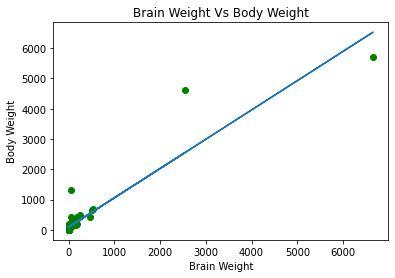

In [79]:
# 2. Chart the original data and the equation on the chart.
plt.scatter(brain_weight, body_weight,color='g')
plt.plot(brain_weight, reg_model_2.predict(brain_weight))
plt.title('Brain Weight Vs Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [81]:
# 3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
r_square_2 = reg_model_2.score(brain_weight, body_weight)
print(f'R^2 score for this equation: {r_square_2:.4f} ')
if r_square_2 > 0.8:
  print('This model is a good fit for the given data')
else:
  print('This model is not a good fit for given data')

R^2 score for this equation: 0.8727 
This model is a good fit for the given data


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [85]:
df3 = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [92]:
x = df3.iloc[ : , :5]
y = df3['Salary']
reg_model_3 = linear_model.LinearRegression().fit(x,y)
x1 = df3.columns[:5]
reg_model_3.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [93]:
reg_model_3.intercept_

11410.14654725559

In [95]:
# 1. Find the linear regression equation for this data using columns 1-5 to column 6.

print(f'Linear regression equation is \n  y={reg_model_3.coef_[0]}*{x1[0]} + {reg_model_3.coef_[1]}*{x1[1]} + {reg_model_3.coef_[2]}*{x1[2]} + {reg_model_3.coef_[3]}*{x1[3]} + {reg_model_3.coef_[4]}*{x1[4]} +{reg_model_3.intercept_}')

Linear regression equation is 
  y=1241.792499601427*Sex + 5586.1814495214385*Rank + 482.85976782882153*Year + -1331.6440634059095*Degree + -128.79057354486122*YSdeg +11410.14654725559


In [96]:
# 2. Find the selection of columns with the best  R2  score.
df3.corr()['Salary']

Sex      -0.252782
Rank      0.867488
Year      0.700669
Degree   -0.069726
YSdeg     0.674854
Salary    1.000000
Name: Salary, dtype: float64

**from the above, we can see that Rank, Degree and YSdeg has higher correlation to salary**

In [97]:
# R^2 score with 'Rank', 'Year' and 'YSdeg'
x2=df3.drop(['Sex','Degree','Salary'],axis=1)
reg_model_4 = linear_model.LinearRegression().fit(x2,y)
reg_model_4.score(x2,y)

0.8456725764485596

In [98]:
# R^2 score with all fields
reg_model_3.score(x,y)

0.8547180674410969

**Even though Rank,Degree,Ysdeg has higher correlation to Salary, R^2 score is higher when all columns are included**

In [99]:
# 3. Report whether sex is a factor in salary.
df3.corr()['Salary']

Sex      -0.252782
Rank      0.867488
Year      0.700669
Degree   -0.069726
YSdeg     0.674854
Salary    1.000000
Name: Salary, dtype: float64

**From the above correlation values, Sex has no coorelation to Salary. Hence there is no salary discrimination by Sex.**